# Data cleaning

This notebook is used to: <br> - import a kaggle dataset (https://www.kaggle.com/datasets/abdallahwagih/books-dataset) containing information about thousands of books <br> - clean the data to be used in a recommendation system <br> - explore some of the data columns to better understand the dataset at hand

### Import and clean the data

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to the data
file_path = "../data/books_dataset.csv"

# Read the CSV file into a DataFrame
books_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been read properly
books_df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [3]:
# Analyse the dataframe
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [4]:
# Count the number of rows in the DataFrame
num_rows = books_df.shape[0]
print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 6810


In [5]:
# Count the number of authors in the DataFrame
num_unique_authors = books_df['authors'].nunique()
print("Number of unique authors:", num_unique_authors)

Number of unique authors: 3780


In [6]:
# Count the number of unique values in the "categories" column
num_unique_categories = books_df['categories'].nunique()
print("Number of unique categories:", num_unique_categories)

Number of unique categories: 567


In [7]:
# Drop rows with null values in specified columns (those that will be relevant for the clustering algorithm and/or website)
cleaned_books_df = books_df.dropna(subset=['authors', 'categories', 'average_rating', 'num_pages', 'ratings_count', 'published_year', 'thumbnail'])

# Reset the index of the DataFrame after dropping rows
cleaned_books_df.reset_index(drop=True, inplace=True)

# Print the first few rows of the cleaned DataFrame to verify
cleaned_books_df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [8]:
# Drop duplicates
cleaned_books_df.drop_duplicates(subset=['title'], inplace = True)

C:\Users\catis\AppData\Local\Temp\ipykernel_24688\1268766359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_books_df.drop_duplicates(subset=['title'], inplace = True)


In [9]:
# Check the number of rows in the cleaned dataframe, as well as unique number of authors and categories
num_rows1 = cleaned_books_df.shape[0]
num_unique_authors1 = cleaned_books_df['authors'].nunique()
num_unique_categories1 = cleaned_books_df['categories'].nunique()

print("Number of rows in the cleaned DataFrame:", num_rows1)
print("Number of unique authors:", num_unique_authors1)
print("Number of unique categories:", num_unique_categories1)

Number of rows in the cleaned DataFrame: 5997
Number of unique authors: 3496
Number of unique categories: 483


In [10]:
# Save cleaned df to csv
cleaned_books_df.to_csv("../data/cleaned_data.csv")

### Data exploration: looking into authors, categories, published year, and ratings

In [11]:
# Which are the most frequent authors in the data?

# Split the 'authors' column by ';' to account for multiple authors in the same cell
authors_expanded = cleaned_books_df['authors'].str.split(';').explode()

# Counting: number of unique authors
unique_authors_count = authors_expanded.nunique()

# Finding the 10 most frequent authors
most_frequent_authors = authors_expanded.value_counts().head(10)

print(f'Number of unique authors: {unique_authors_count}')
print('')
print('The 10 most frequent authors are:')
print(most_frequent_authors)

Number of unique authors: 4141

The 10 most frequent authors are:
authors
Agatha Christie              37
Stephen King                 33
William Shakespeare          29
Mercedes Lackey              24
Virginia Woolf               23
Sandra Brown                 23
Margaret Weis                23
John Ronald Reuel Tolkien    23
Janet Evanovich              22
Orson Scott Card             21
Name: count, dtype: int64


In [12]:
# Exploding the genres column 
genre_data = cleaned_books_df.explode('categories')

# Grouping by release year and genres, then counting
genre_count_over_years = genre_data.groupby(['published_year', 'categories']).size().reset_index(name='count')

In [13]:
# Calculate the total count for each genre
total_count_per_genre = genre_count_over_years.groupby('categories')['count'].sum()

# Identify the top 10 genres based on the total count
top_10_genres = total_count_per_genre.nlargest(10)

# Convert to a DataFrame 
top_10_genres_df = top_10_genres.reset_index().set_index('categories')
top_10_genres_df

,count
categories,
Fiction,2341
Juvenile Fiction,487
Biography & Autobiography,372
History,252
Literary Criticism,154
Philosophy,147
Religion,133
Comics & Graphic Novels,127
Drama,109


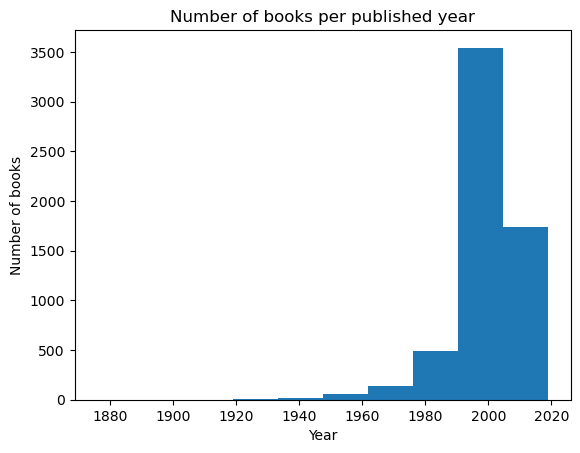

In [14]:
# Check distribution of published_year
plt.hist(cleaned_books_df["published_year"])

# Add title and axis names
plt.title('Number of books per published year')
plt.xlabel('Year')
plt.ylabel('Number of books')

# Display histogram
plt.show()

C:\Users\catis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\catis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\catis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\catis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

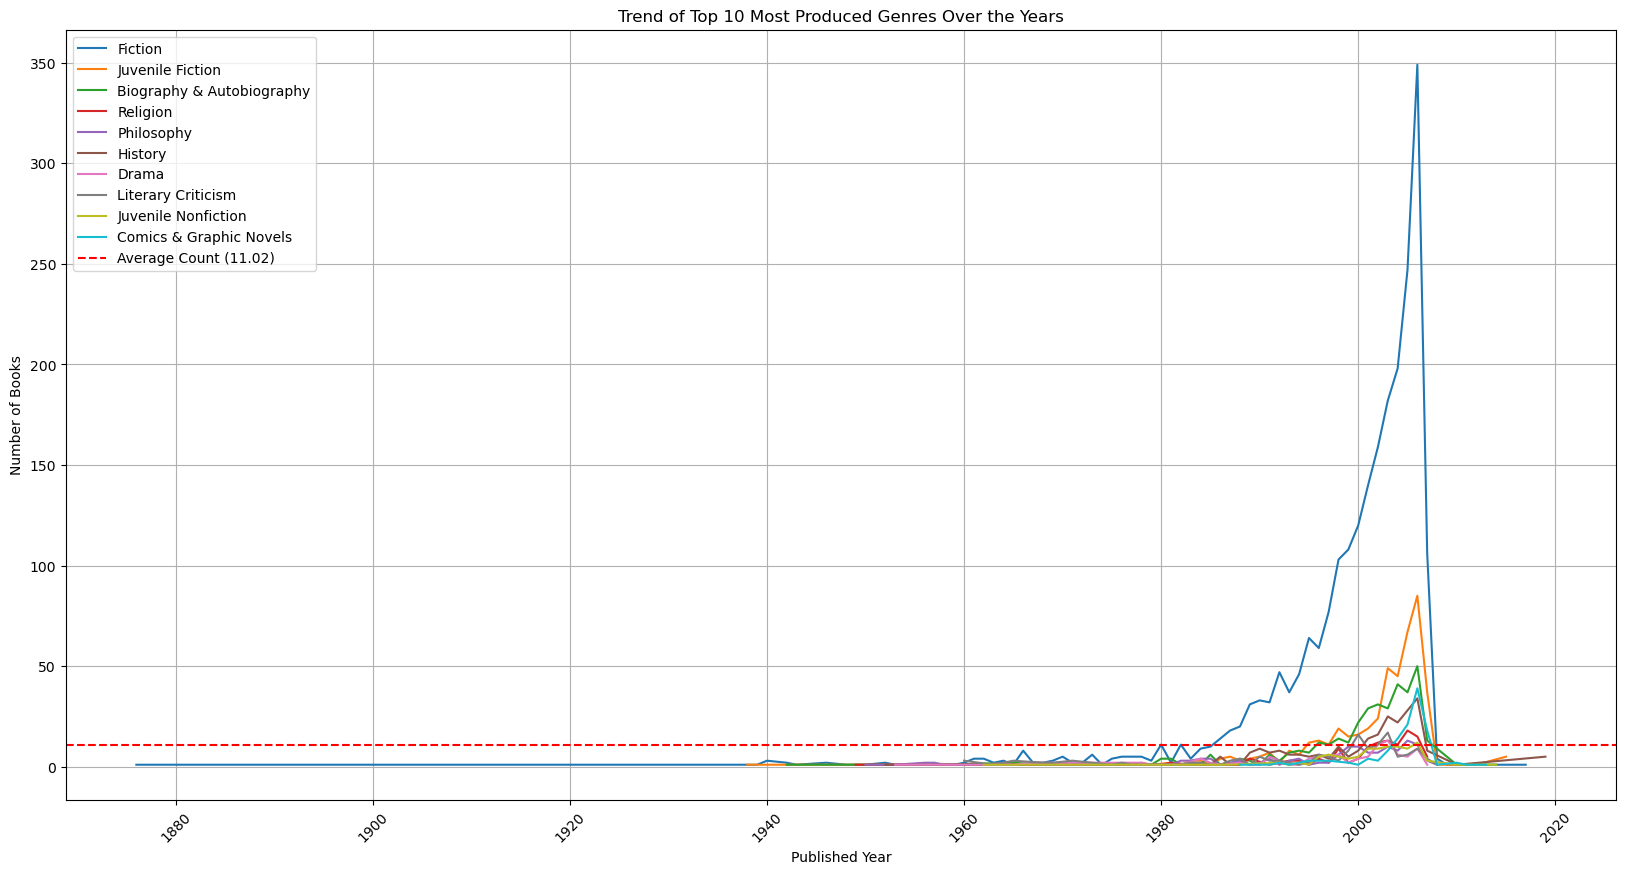

In [15]:
#Plot a line graph to show the trends in the top ten genres

# Filter the dataset to include only the top 10 genres
top_genres_data = genre_count_over_years[genre_count_over_years['categories'].isin(top_10_genres.index)]

# Calculate the average count of shows for the top 10 genres
average_count_top_genres = top_genres_data['count'].mean()

# Plotting the trend of the top 10 genres over the years
plt.figure(figsize=(20, 10))
sns.lineplot(data=top_genres_data, x="published_year", y="count", hue="categories")
plt.title('Trend of Top 10 Most Produced Genres Over the Years')
plt.xlabel('Published Year')
plt.ylabel('Number of Books')
plt.legend(title='Top 10 Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

# Adding a horizontal line at the average count
plt.axhline(y=average_count_top_genres, color='red', linestyle='--', label=f'Average Count ({average_count_top_genres:.2f})')
plt.legend()

# Show the plot
plt.show()

In [16]:
# Filter out data below 1980
filtered_data = cleaned_books_df.loc[cleaned_books_df['published_year']>=1980]
filtered_data = filtered_data.reset_index(drop=True)

In [17]:
# Exploding the genres column 
genre_data = filtered_data.explode('categories')

# Grouping by release year and genres, then counting
genre_count_over_years = genre_data.groupby(['published_year', 'categories']).size().reset_index(name='count')

In [18]:
# Calculate the total count for each genre
total_count_per_genre = genre_count_over_years.groupby('categories')['count'].sum()

In [19]:
# Identify the top 10 genres based on the total count
top_10_genres = total_count_per_genre.nlargest(10)

# Convert to a DataFrame 
top_10_genres_df = top_10_genres.reset_index().set_index('categories')
top_10_genres_df

,count
categories,
Fiction,2246
Juvenile Fiction,474
Biography & Autobiography,363
History,245
Literary Criticism,131
Philosophy,128
Comics & Graphic Novels,127
Religion,126
Juvenile Nonfiction,97


C:\Users\catis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\catis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\catis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\catis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

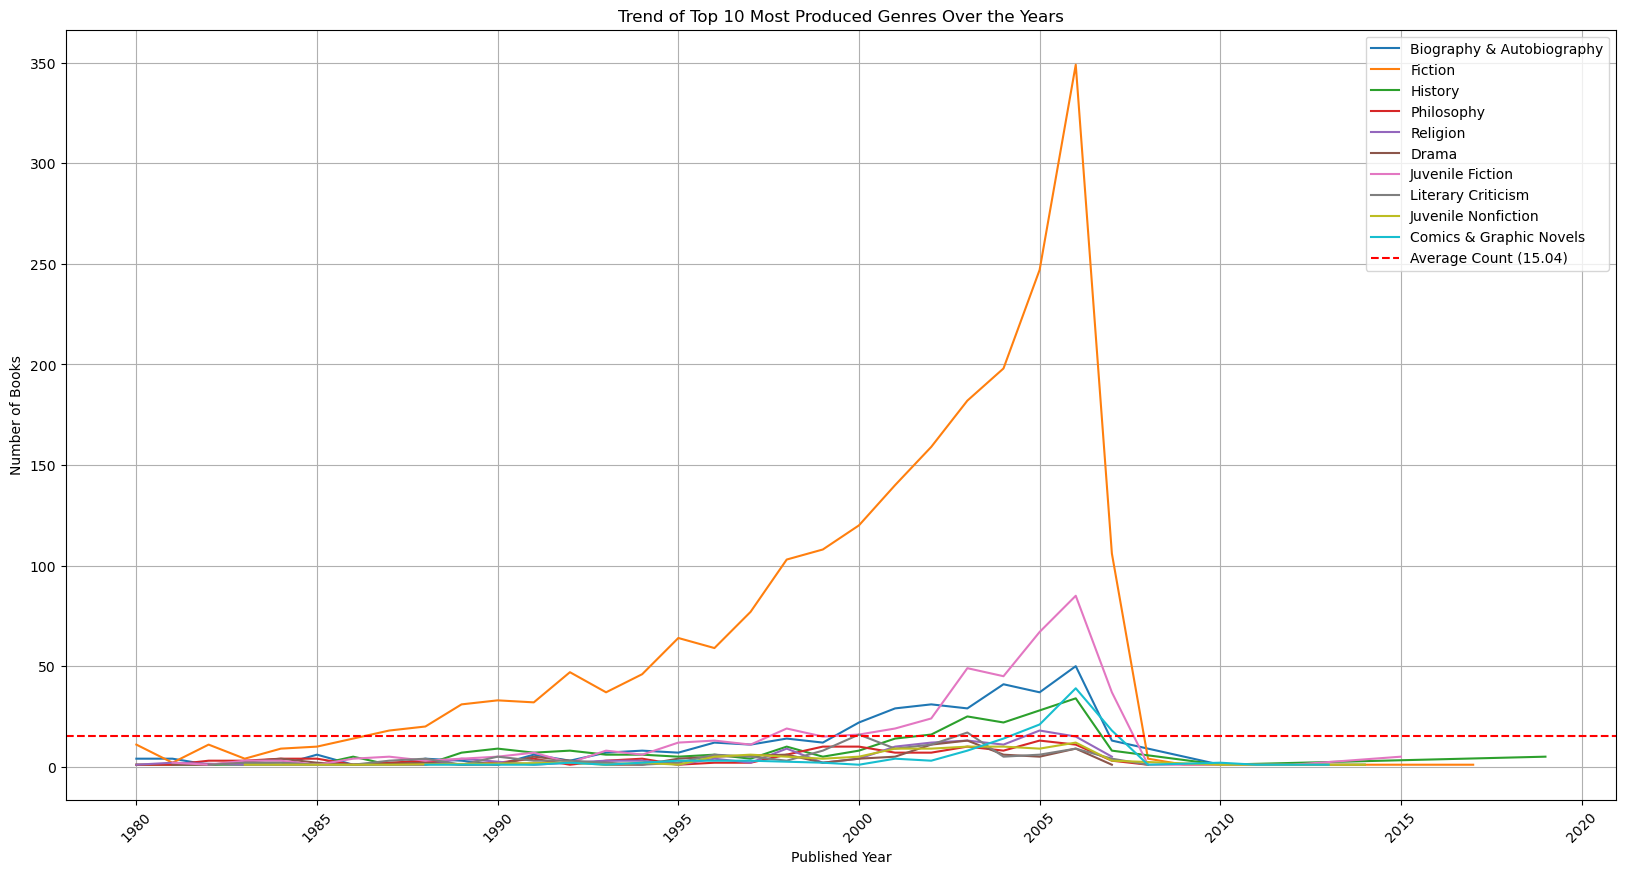

In [20]:
# Plot graph again

# Filter the dataset to include only the top 10 genres
top_genres_data = genre_count_over_years[genre_count_over_years['categories'].isin(top_10_genres.index)]

# Calculate the average count of shows for the top 10 genres
average_count_top_genres = top_genres_data['count'].mean()

# Plotting the trend of the top 10 genres over the years
plt.figure(figsize=(20, 10))
sns.lineplot(data=top_genres_data, x="published_year", y="count", hue="categories")
plt.title('Trend of Top 10 Most Produced Genres Over the Years')
plt.xlabel('Published Year')
plt.ylabel('Number of Books')
plt.legend(title='Top 10 Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

# Adding a horizontal line at the average count
plt.axhline(y=average_count_top_genres, color='red', linestyle='--', label=f'Average Count ({average_count_top_genres:.2f})')
plt.legend()

# Show the plot
plt.show()

In [21]:
# What is the average rating in the dataset?
av_rating = books_df["average_rating"].mean()
print ("The average rating is:", av_rating)

The average rating is: 3.933283582089552


In [22]:
# What is the average rating by category?
group_genre = books_df["average_rating"].groupby(books_df["categories"]).mean()
group_sorted = group_genre.sort_values(ascending=False)

group_sorted.head(10)

categories
Botanique                                            5.00
Spiritual life                                       5.00
Existentialism                                       4.91
Imaginary wars and battles                           4.59
Argentine literature                                 4.54
Characters and characteristics in motion pictures    4.54
Mississippi                                          4.54
Zoology                                              4.52
Costume                                              4.52
Chrestomanci (Fictitious character)                  4.50
Name: average_rating, dtype: float64

### Main takeaways:

- The original dataset is composed of 6810 entries. After eliminating empty rows on the relevant columns, and duplicated books, the cleaned dataset (to be used in the recommendation system) has a total of 5997 entries. 
- There are 4141 unique authors in the (cleaned) dataset, the most frequent being Agatha Cristie, Stephen King and William Shakespeare. 
- There are 483 unique categories (that is, book genres), with the most common being Fiction, Juvenile Fiction and Biography & Autobiography.
- Most books in the dataset were published after 1980.
- The average book rating in the dataset is of 3.93. The highest rated books fall in the categories of Botanique, Spiritual Life and Existentialism